In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
import seaborn as sns

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
457,-122.25,37.87,42.0,1756.0,465.0,2184.0,422.0,2.5562,NEAR BAY,371400.0
20440,-118.77,34.24,6.0,16222.0,2309.0,6700.0,2080.0,6.4963,<1H OCEAN,308100.0
14088,-117.09,32.76,43.0,3889.0,711.0,1466.0,663.0,3.5529,NEAR OCEAN,223000.0
17981,-121.95,37.31,27.0,2462.0,570.0,1278.0,565.0,3.5652,<1H OCEAN,329500.0
3305,-122.65,38.96,27.0,2143.0,580.0,898.0,367.0,1.6769,INLAND,63200.0
...,...,...,...,...,...,...,...,...,...,...
10663,-117.82,33.66,24.0,4227.0,641.0,1605.0,589.0,6.4238,<1H OCEAN,278400.0
3583,-118.55,34.23,25.0,4409.0,1018.0,4579.0,1010.0,2.8727,<1H OCEAN,245100.0
653,-122.13,37.71,44.0,1421.0,298.0,609.0,270.0,3.5781,NEAR BAY,180000.0
11779,-121.28,38.77,6.0,3819.0,550.0,1738.0,587.0,5.8718,INLAND,201400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

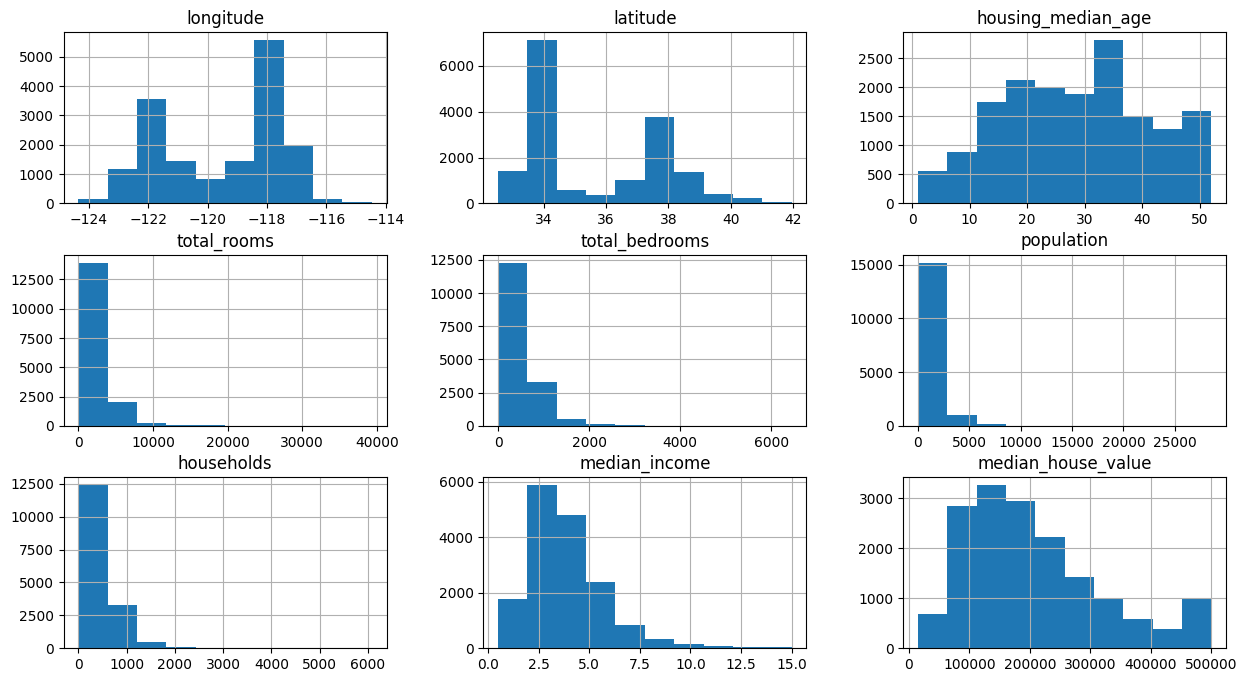

In [11]:
train_data.hist(figsize=(15,8))

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

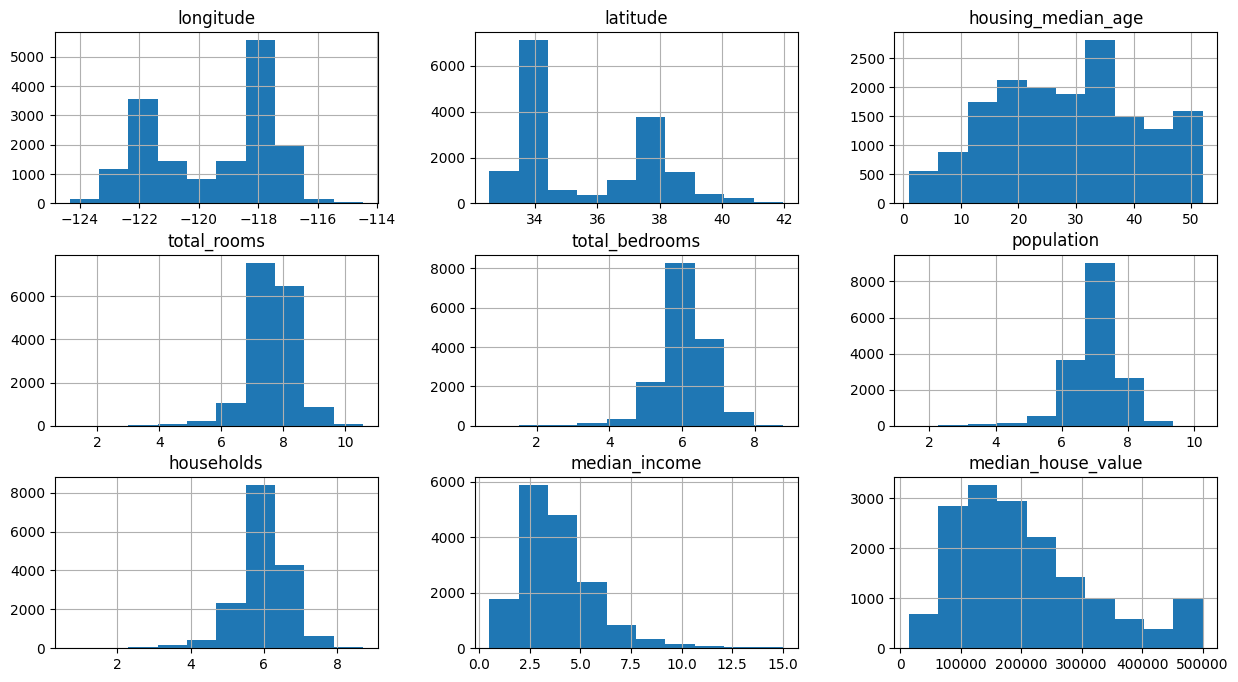

In [14]:
train_data.hist(figsize=(15,8))

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

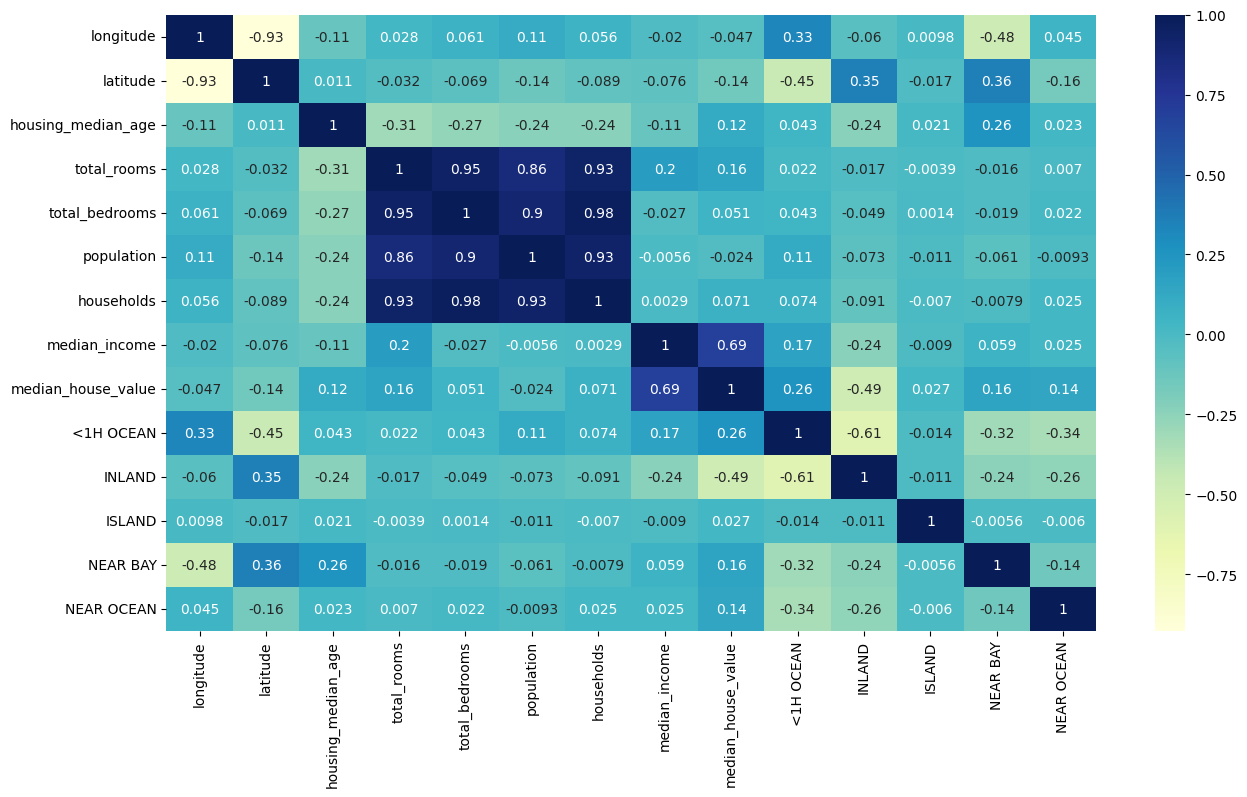

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

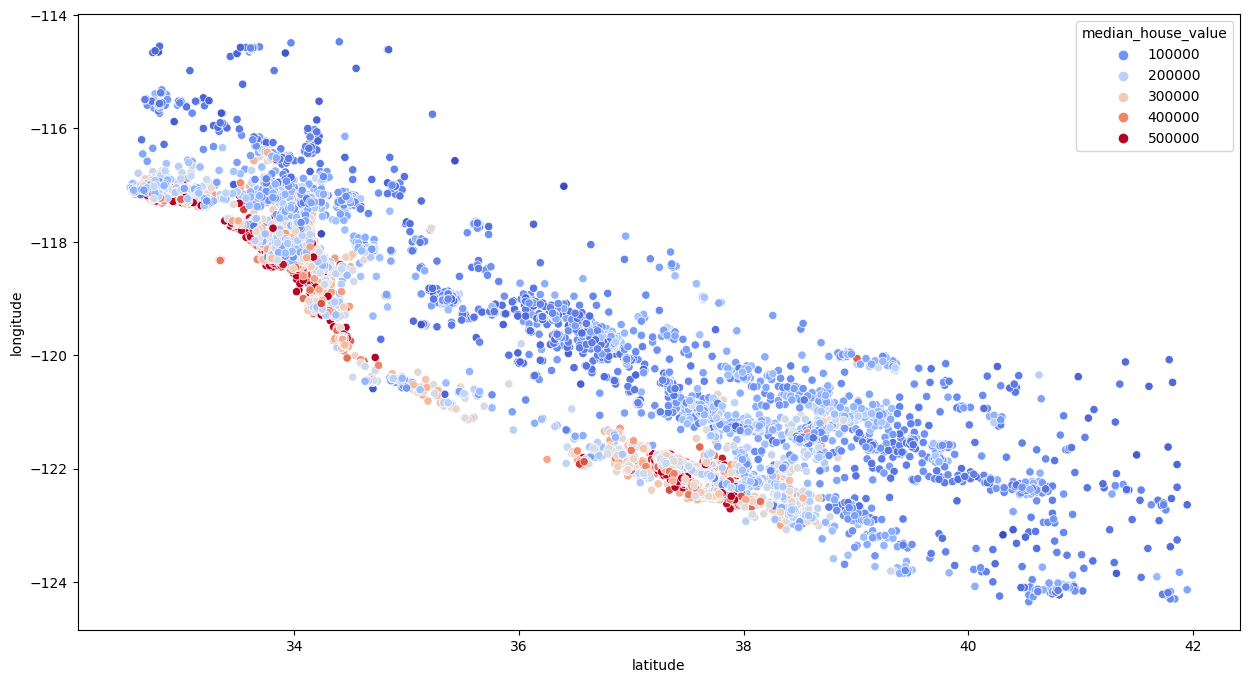

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value", palette="coolwarm")

In [19]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

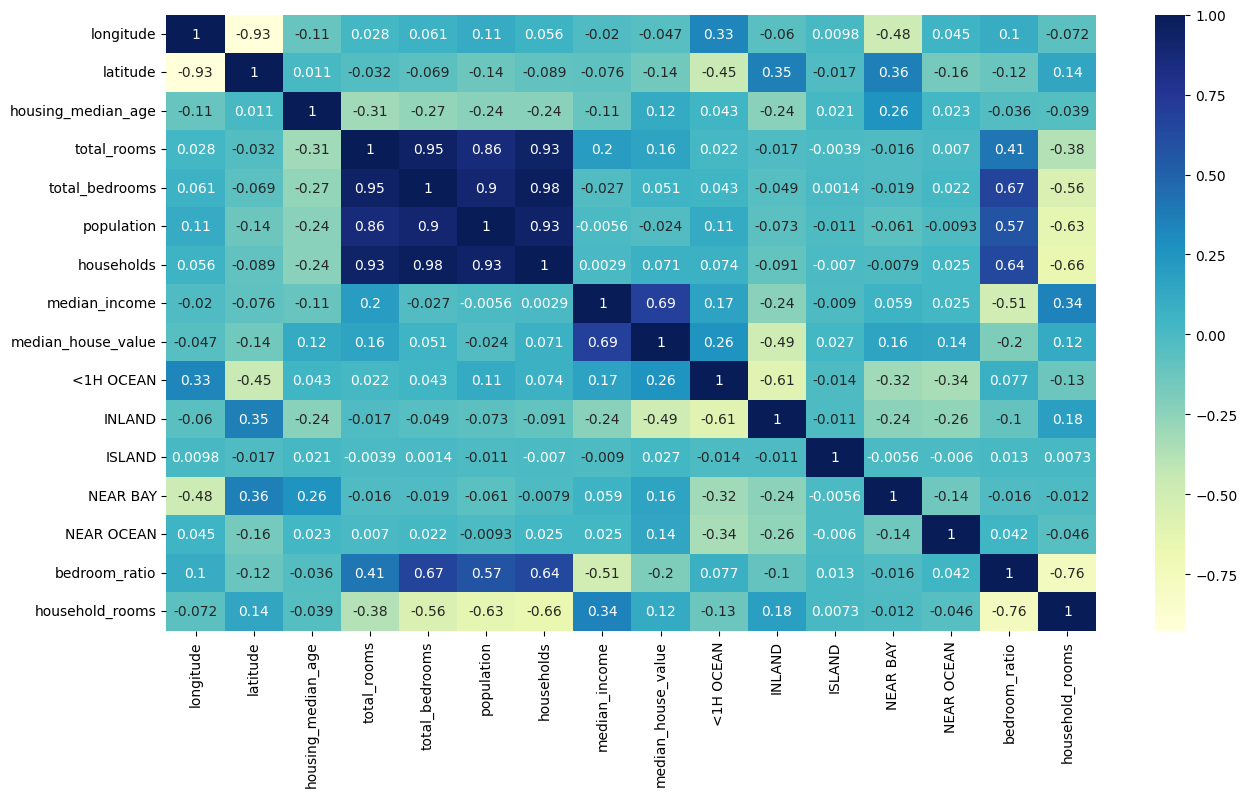

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train,y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [26]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

X_test,y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [28]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
457,-122.25,37.87,42.0,7.471363,6.144186,7.689371,6.047372,2.5562,False,False,False,True,False,0.822365,1.235473
20440,-118.77,34.24,6.0,9.694185,7.745003,8.810012,7.640604,6.4963,True,False,False,False,False,0.798933,1.268772
14088,-117.09,32.76,43.0,8.266164,6.568078,7.290975,6.498282,3.5529,False,False,False,False,True,0.794574,1.272054
17981,-121.95,37.31,27.0,7.809135,6.347389,7.153834,6.338594,3.5652,True,False,False,False,False,0.812816,1.231998
3305,-122.65,38.96,27.0,7.670429,6.364751,6.801283,5.908083,1.6769,False,True,False,False,False,0.829778,1.298294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,-117.82,33.66,24.0,8.349484,6.464588,7.381502,6.380123,6.4238,True,False,False,False,False,0.774250,1.308671
3583,-118.55,34.23,25.0,8.391630,6.926577,8.429454,6.918695,2.8727,True,False,False,False,False,0.825415,1.212892
653,-122.13,37.71,44.0,7.259820,5.700444,6.413459,5.602119,3.5781,False,False,False,True,False,0.785205,1.295906
11779,-121.28,38.77,6.0,8.248006,6.311735,7.461066,6.376727,5.8718,False,True,False,False,False,0.765244,1.293454


In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
457,-122.25,37.87,42.0,7.471363,6.144186,7.689371,6.047372,2.5562,371400.0,False,False,False,True,False,0.822365,1.235473
20440,-118.77,34.24,6.0,9.694185,7.745003,8.810012,7.640604,6.4963,308100.0,True,False,False,False,False,0.798933,1.268772
14088,-117.09,32.76,43.0,8.266164,6.568078,7.290975,6.498282,3.5529,223000.0,False,False,False,False,True,0.794574,1.272054
17981,-121.95,37.31,27.0,7.809135,6.347389,7.153834,6.338594,3.5652,329500.0,True,False,False,False,False,0.812816,1.231998
3305,-122.65,38.96,27.0,7.670429,6.364751,6.801283,5.908083,1.6769,63200.0,False,True,False,False,False,0.829778,1.298294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,-117.82,33.66,24.0,8.349484,6.464588,7.381502,6.380123,6.4238,278400.0,True,False,False,False,False,0.774250,1.308671
3583,-118.55,34.23,25.0,8.391630,6.926577,8.429454,6.918695,2.8727,245100.0,True,False,False,False,False,0.825415,1.212892
653,-122.13,37.71,44.0,7.259820,5.700444,6.413459,5.602119,3.5781,180000.0,False,False,False,True,False,0.785205,1.295906
11779,-121.28,38.77,6.0,8.248006,6.311735,7.461066,6.376727,5.8718,201400.0,False,True,False,False,False,0.765244,1.293454


In [31]:
X_test_s = scaler.transform(X_test)

In [33]:
reg.score(X_test_s,y_test)

0.6696233476248461

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test_s,y_test)

0.8109032383311806